In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt

-> todo label tridimensionel

-> calculer matrice labels

In [2]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

Mean acc =  0.75
Mean time =  0.49171687761942545
Mean std =  0.11217271979803049
CPU times: user 25.7 s, sys: 27.5 s, total: 53.2 s
Wall time: 15.3 s


Px shape before (25, 25)
Px shape meanwhile (25, 25)


ValueError: could not broadcast input array from shape (25,1,25) into shape (25,25)

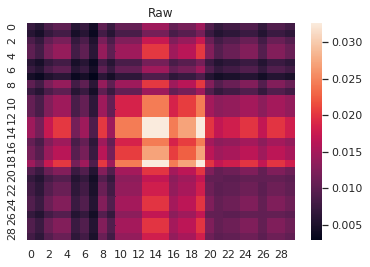

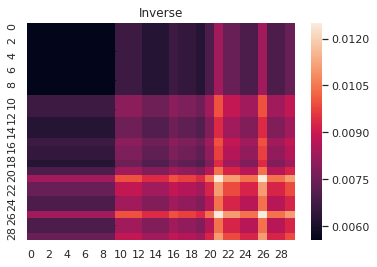

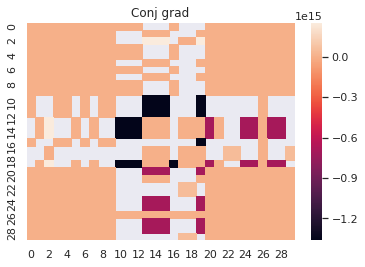

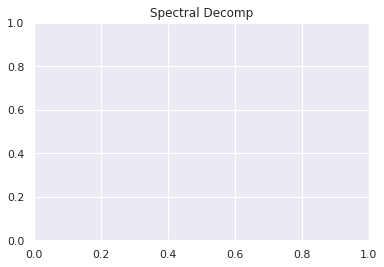

In [2]:
db = Database()
d = []
db2 = db.gen_database_test(9, 5, 5, 3)
N = np.max(db2[:,0].shape[0])
M = np.max([len(x.nonzero()[0]) for x in db2[:,0]])
ker = Kernel(0.95,N,M)
#brut
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.raw_kernel))
plt.title("Raw")
plt.figure()
#par inverse, significativement plus rapide
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.inv_kernel))
plt.title("Inverse")
plt.figure()
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.conj_grad_kernel))
plt.title("Conj grad")
#plt.figure()
#sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.fixed_point_kernel))
plt.figure()
plt.title("Spectral Decomp")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.spec_decomp_kernel))